# Importing the Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Selection
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
url_file = "https://raw.githubusercontent.com/sidhantjain02/Exploratory-Data-Analysis/main/attrition.csv"
df = pd.read_csv(url_file)

In [3]:
# Showing the first five rows of df
df.head(5)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [4]:
# Checking for Unique Value in each Column
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
EducationField                6
EnvironmentSatisfaction       4
Gender                        2
JobInvolvement                4
JobLevel                      5
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
OverTime                      2
TotalWorkingYears            40
WorkLifeBalance               4
YearsAtCompany               37
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
DistanceFromHome             29
dtype: int64

In [5]:
# Checking for null values in each Column
np.sum(df.isnull())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

So, there are no null value's in the dataset.

In [6]:
# Copying the dataset into another df so that original dataset remains intact
df2 = df.copy()
# Utility function for table
def table_df(x): 
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [7]:
# Utility Function for graph
def graph_df(x, y = 'bar', z = 0):
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], inplace = True)
    feature['Total Employee'].plot(kind = y, ax = ax1, colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

# Univariate Analysis

### Attrition
> Weather the employee has left the company or not



***-> Is Attrition even there in the company?***

In [8]:
attrition=pd.crosstab(df.Attrition,columns="Count of employees", normalize = True)
attrition

col_0,Count of employees
Attrition,
0,0.838776
1,0.161224


* 0 -> In the Company
* 1 -> Left the Company

0    1233
1     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

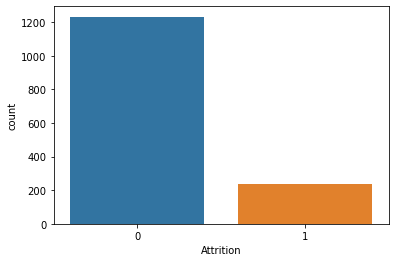

In [9]:
print(df.Attrition.value_counts())
sns.countplot(df.Attrition)

*  In the company, there are 1470 employees, 237 employees who compose 16% of the total number of employees left the company for some reasons. 
* Besides that, 1233 employee is currently continuing to work in the same company.



## Categorical Features

### Business Travel 
> It is work related travel by the employee for the company




In [10]:
bussiness_travel= pd.crosstab(df.BusinessTravel,columns="Count of Employees")
bussiness_travel

col_0,Count of Employees
BusinessTravel,
Non-Travel,150
Travel_Frequently,277
Travel_Rarely,1043


In [11]:
label = ['Travel Rarely', 'Travel Frequently', 'Non-Travel']
value = [1043, 277, 150]

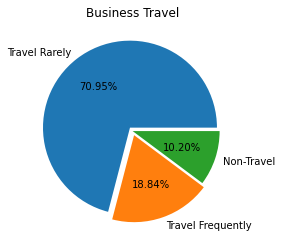

In [12]:
plt.pie(value,labels=label,autopct="%0.2F%%",explode=[0.05,0.05,0])
plt.title("Business Travel")
plt.show()

From the above plot we can see that,
*   Around 70% of employee travel rarely and around 10% of employee's do not travel at all in the company.
*   19% of employee's travel frequently in the company.



### Department
> These are the division's in the company for proper functioning



In [13]:
department=pd.crosstab(df.Department,columns="Count of Employees")
department

col_0,Count of Employees
Department,
Human Resources,63
Research & Development,961
Sales,446


In [14]:
label = ["Human Resources","Research & Development","Sales"]
value = [63,961,446]

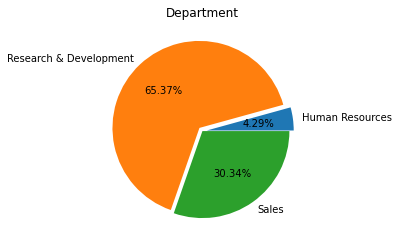

In [15]:
plt.pie(value,labels=label,explode=[0.05,0.05,0],autopct="%0.2f%%")
plt.title("Department")
plt.show()

From the above plot & table,
*   Around 65% of employee's work in R&D department which is maximum in the company.
*   30% of employee work in sales and around 5% work in HR in the company.



### Education Field
> It is the field of study for each employee



In [16]:
education_field = pd.crosstab(df.EducationField,columns="Percentage", normalize = True)
education_field

col_0,Percentage
EducationField,
Human Resources,0.018367
Life Sciences,0.412245
Marketing,0.108163
Medical,0.315646
Other,0.055782
Technical Degree,0.089796


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:title={'center':'Education Field'}, xlabel='EducationField', ylabel='count'>

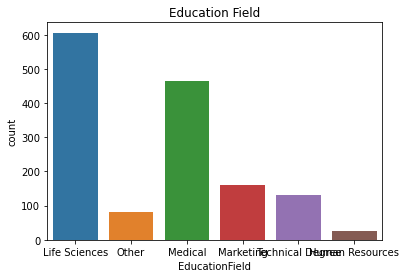

In [17]:
print(df.EducationField.value_counts())
plt.title("Education Field")
sns.countplot(df.EducationField)

From the above plot & table we can see that,
*   Maximum no. of employee's are from Life Sciences background i.e 41% in the company. 
*   Minimum no. of employee's are from Human Resources background i.e 2% in the company.




### Gender
> Employee is Male or Female



In [18]:
gender = pd.crosstab(df.Gender, columns = "Count of Employees")
gender

col_0,Count of Employees
Gender,
Female,588
Male,882


In [19]:
label = ["Male", "Female"]
value = [882, 588]

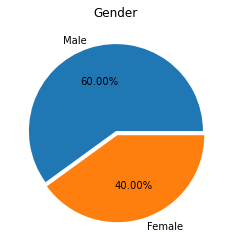

In [20]:
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0,0.05])
plt.title("Gender")
plt.show()

From the above plot we can say that,
*   60% of employee are Male whereas 40% employee are female in the company.
*   Male to Female ratio is 3:2.



### Marital Status
> Employee in the company is Single, Married or Divorced



In [21]:
marital_status = pd.crosstab(df.MaritalStatus, columns="Count of Employees")
marital_status

col_0,Count of Employees
MaritalStatus,
Divorced,327
Married,673
Single,470


In [22]:
label = ["Divorced", "Married", "Single"]
value = [327, 673, 470]

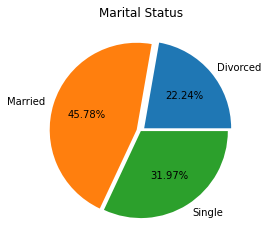

In [23]:
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0.05,0.05,0])
plt.title("Marital Status")
plt.show()

From the above plot & table we can see that,
*   Maximum employee's i.e 46% are married in the company.
*   There are around 22% employee's who are divorced.
* 32% employee's are single.



### Overtime
> Extra time employee has worked 



In [24]:
overtime=pd.crosstab(df.OverTime,columns="count")
overtime

col_0,count
OverTime,
No,1054
Yes,416


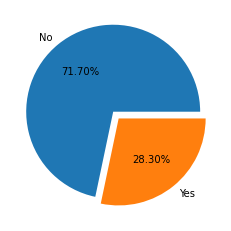

In [25]:
value = [1054,416]
label = ["No","Yes"]
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0.05,0.05])
plt.show()

From the above plot & table we can see that,
*   More than 72% of employee do not work overtime in the company.
*   Around 28% have worked overtime in the company.



## Discrete Features

### Environmental Satisfaction
> Level of staisfaction in company's environment



In [26]:
environmentSatisfaction=pd.crosstab(df.EnvironmentSatisfaction,columns="Count")
environmentSatisfaction

col_0,Count
EnvironmentSatisfaction,
1,284
2,287
3,453
4,446


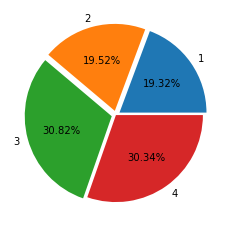

In [27]:
label=["1","2","3","4"]
value=[284,287,453,446]
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0.05,0.05,0.05,0])
plt.show()

From the above plot we can observe that,
*   30.34% of employee's are highly satisfied in the company.
*   30.82% of employee's are satisfied in the company.
*   19.52% of employee's are dis-satisfied in the company.
*   19.32% of employee's are highly dis-satisfied in the company.



### Work Life Balance



In [28]:
worklife=pd.crosstab(df.WorkLifeBalance,columns="count")
worklife

col_0,count
WorkLifeBalance,
1,80
2,344
3,893
4,153


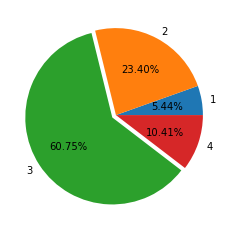

In [29]:
label=[1,2,3,4]
value=[80,344,893,153]
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0,0,0.05,0])
plt.show()

From the above plot we can say that,
*   Around 60% of employees are having good work life balance.
*   A little less then 6% of employee's have bad work life balance.



### Job Involvement
> Measure's the scale of involvement in job by employee



In [30]:
jobinvolvement=pd.crosstab(df.JobInvolvement,columns="Count")
jobinvolvement

col_0,Count
JobInvolvement,
1,83
2,375
3,868
4,144


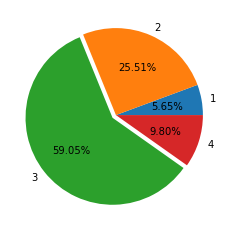

In [31]:
label = [1,2,3,4]
value = [83, 375, 868, 144]
plt.pie(value, labels = label, explode = [0, 0, 0.05, 0],autopct="%0.2f%%")
plt.show()

*  In the Company, 59% of employees rated for Job Involvement on the 3, 10% of employees rated 4 while 25% and 6% rated 2 and 1 respectively.

### Job Levels

In [32]:
joblevel=pd.crosstab(df.JobLevel,columns="Count")
joblevel

col_0,Count
JobLevel,
1,543
2,534
3,218
4,106
5,69


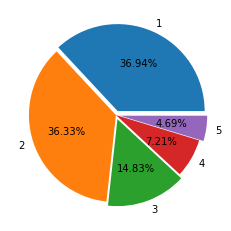

In [33]:
label=[1,2,3,4,5]
value=[543,534,218,106,69]
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0.05,0,0.05,0,0.05])
plt.show()

From the above plot we can see that,
*   Around 73% of employees are in the starting phase.
*   A little less than 15% of employees, are experienced.



### Job Satisfaction
> Level at which employee are satisfied with job



In [34]:
jobSatisfaction=pd.crosstab(df.JobSatisfaction,columns="Count")
jobSatisfaction

col_0,Count
JobSatisfaction,
1,289
2,280
3,442
4,459


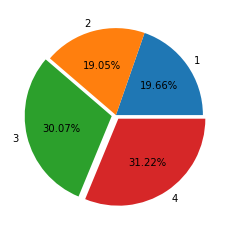

In [35]:
label = [1,2,3,4]
value = [289,280,442,459]
plt.pie(value,labels=label,autopct="%0.2f%%",explode=[0,0,0.05,0.05])
plt.show()

From the above plot we can see that,
* 31.22% employees have job satisfaction of scale 4 in the company.  
* 30.07% employees have job satisfaction of scale 3 in the company.
* 19.05% employees have job satisfaction of scale 2 in the company.
* 19.66% employees have job satisfaction of scale 1 in the company.

## Continous Features

### Age
> No. of year's employee has lived



In [36]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [37]:
df.Age.mode()

0    35
Name: Age, dtype: int64

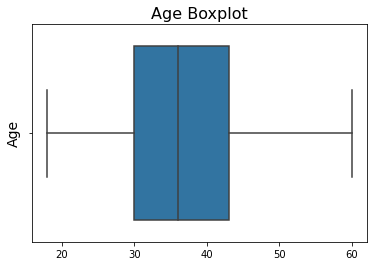

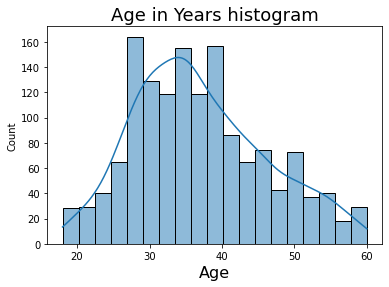

In [38]:
sns.boxplot(df.Age)
plt.xlabel(" ")
plt.ylabel("Age", fontsize=14)
plt.title("Age Boxplot",fontsize=16)
plt.show()
sns.histplot(df.Age, kde = True)
plt.title('Age in Years histogram', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.show()

From above plot & table we can observe that,
*   Youngest employee is 18 year's old.
*   Oldest employee is 60 year's old.
* 75% of employees have age less then 43 in the company.
* Only 25% of employees have age greater then 43 year's.
* Age distribution is little bit skewed towards right.
* Range of age is from 18 to 60 year's in the company.
* Most of the people have age of 35 year's.
* There are no outlier's in Age in the company.



### Monthly Income
> Monthly income each employee gets.



In [39]:
df.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

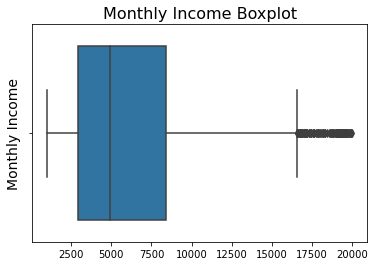

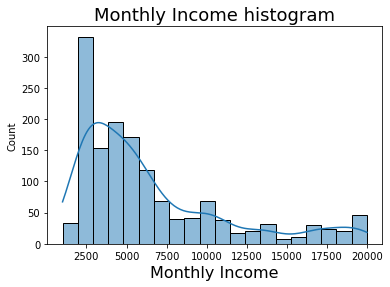

In [40]:
sns.boxplot(df.MonthlyIncome)
plt.xlabel(" ")
plt.ylabel("Monthly Income", fontsize=14)
plt.title("Monthly Income Boxplot",fontsize=16)
plt.show()
sns.histplot(df.MonthlyIncome, kde = True)
plt.title('Monthly Income histogram', fontsize=18)
plt.xlabel('Monthly Income', fontsize=16)
plt.show()

From above we can see that,
*   Maximum monthly income of employee is 19999.
*   Minimum monthly income of employee is 1009.
* 25% of employees have monthly income less than 2911 in the company.
* 50% of employee have monthly income less than 4919 in the company.
* 75% of employee have monthly income less than 8379 in the company.
* 25% of employee have monthly income greater than 8379 in the company.
* Average monthly income is 4919 in the company.
* Range of monthly income lies between 1009 and 19999.
* Monthly Income is right skewed, implying many employee's recieve lower income.



### Total Working Years
> Total Year's of experience does the employee have



In [41]:
df.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

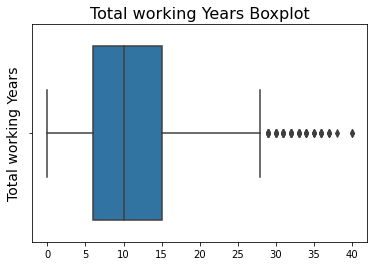

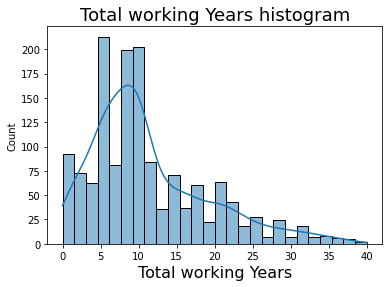

In [42]:
sns.boxplot(df.TotalWorkingYears)
plt.xlabel(" ")
plt.ylabel("Total working Years", fontsize=14)
plt.title("Total working Years Boxplot",fontsize=16)
plt.show()
sns.histplot(df.TotalWorkingYears, kde = True)
plt.title('Total working Years histogram', fontsize=18)
plt.xlabel('Total working Years', fontsize=16)
plt.show()

From obove we can observe that,
* Maximum total working years of the employee is  40 years
* Minimum total working years of the employee is 0 years
* Range of total working years lies between 0 to 40 years.
* 25% of employee's have less than 6 years of total working years.
* 50% of employee's have less than 10 years of total working years.
* 75% of employee's have less than 15 years of total working years.
* 25% of employees have total working years greater than 15 years.
* Total Working years distribution is positively skewed.
* From the boxplot we can see that there are some outlier's in total working years.


### Years at Company
> No. of year's employee has worked in the company



In [43]:
df.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

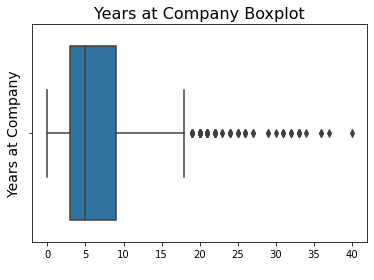

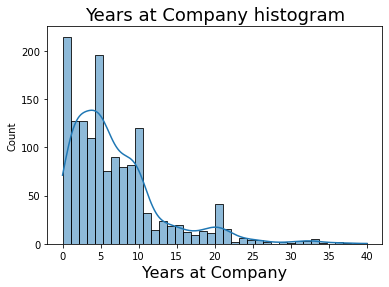

In [44]:
sns.boxplot(df.YearsAtCompany)
plt.xlabel(" ")
plt.ylabel("Years at Company", fontsize=14)
plt.title("Years at Company Boxplot",fontsize=16)
plt.show()
sns.histplot(df.YearsAtCompany, kde = True)
plt.title('Years at Company histogram', fontsize=18)
plt.xlabel('Years at Company', fontsize=16)
plt.show()

From above we can see that,
*   Maximum year's of employee in company is 40 years. Meaning, company is minimum 40 year's old.
*   Minimum year's of employee in company is 0 years.
* Average years at company of an employee is 7 years.
* 25% of employees have years at company less than 3 years.
* 50% of employees have years at company less than 5 years.
* 75% of employees have years at company less than 9 years.
* 25% of employees have years at company more than 9 years.
* Year's at working in the company is positively skewed.



### Years in Current Role
> No. of years employee is in current role in the company 



In [45]:
df.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

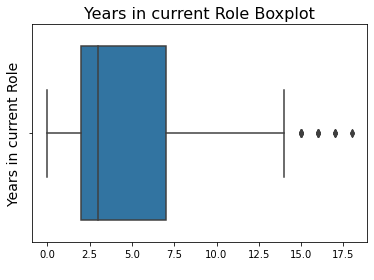

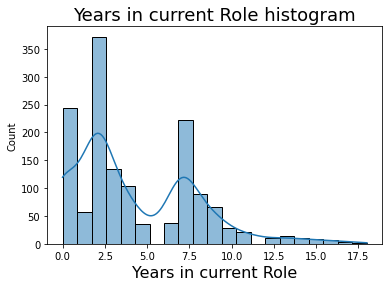

In [46]:
sns.boxplot(df.YearsInCurrentRole)
plt.xlabel(" ")
plt.ylabel("Years in current Role", fontsize=14)
plt.title("Years in current Role Boxplot",fontsize=16)
plt.show()
sns.histplot(df.YearsInCurrentRole, kde = True)
plt.title('Years in current Role histogram', fontsize=18)
plt.xlabel('Years in current Role', fontsize=16)
plt.show()

From above we can see that,
*   Maximum years for employee in current role in company is 18 years.
*   Minimum years for employee in current role in company is 0 years.
* 25% of employee in the company have year's in current role less than 2.
* 50% of employee in the company have year's in current role less than 3.
* 75% of employee in the company have year's in current role less than 7.
* 25% of employee in the company have year's in current role greater than 7.
* Year's in current role is not symmetric.



### Years since last Promotion
> No. of years, employee last got the promotion



In [47]:
df.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

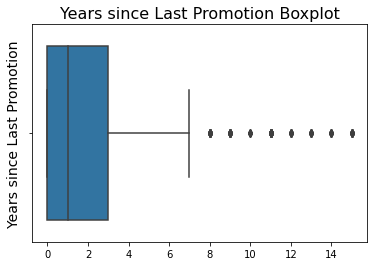

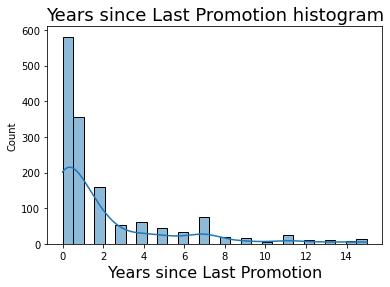

In [48]:
sns.boxplot(df.YearsSinceLastPromotion)
plt.xlabel(" ")
plt.ylabel("Years since Last Promotion", fontsize=14)
plt.title("Years since Last Promotion Boxplot",fontsize=16)
plt.show()
sns.histplot(df.YearsSinceLastPromotion, kde = True)
plt.title('Years since Last Promotion histogram', fontsize=18)
plt.xlabel('Years since Last Promotion', fontsize=16)
plt.show()

*   Maximum years it took to promote an employee in the company is 15.
*   Minimum years it took to promote an employee in the company is 0.
* On an average it take's 2 years to promote an employee in the company.
* 25% of employee get promotion in less than 0 years.
* 50% of employee get promotion in less than 1 years.
* 75% of employee get promotion in less than 3 years.
* 25% of employee get promotion in greater than 3 years.
* Years since last promotion data is positevely skewed.




### Years with current manager


> No. of years, employee worked with current manager



In [49]:
df.YearsWithCurrManager.describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

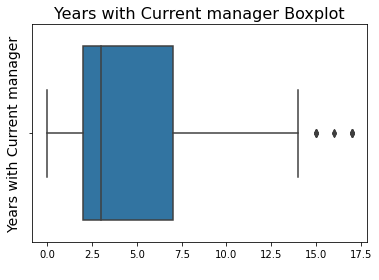

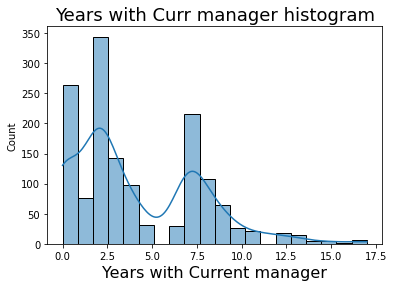

In [50]:
sns.boxplot(df.YearsWithCurrManager)
plt.xlabel(" ")
plt.ylabel("Years with Current manager", fontsize=14)
plt.title("Years with Current manager Boxplot",fontsize=16)
plt.show()
sns.histplot(df.YearsWithCurrManager, kde = True)
plt.title('Years with Curr manager histogram', fontsize=18)
plt.xlabel('Years with Current manager', fontsize=16)
plt.show()

From above we can see that,
*   Maximum year's with current manager in the company is 17 years.
*   Minimum year's with current manager in the company is 0 years.
* 25% of employee have year's with current manager less than 2.
* 50% of employee have year's with current manager less than 3.
* 75% of employee have year's with current manager less than 7.
* 25% of employee have year's with current manager greater than 7.
* Since, mean is not equal median year's with current manager data is not symmetric.



From above we can see that,
*   Maximum distance from home for an employee in the company is 29.
*   Minimum distance from home for an employee in the company is 1.
* 25% of employee have distance from home less than 2.
* 50% of employee have distance from home less than 7.
* 75% of employee have distance from home less than 14.
* 25% of employee have distance from home greater than 14.
* Since, mean is not equal median distance from home data is not symmetric.

### Distance from Home


> Distance to travel from Home to reach company



In [51]:
df.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

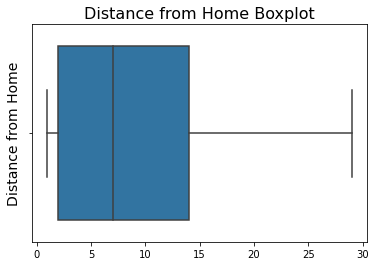

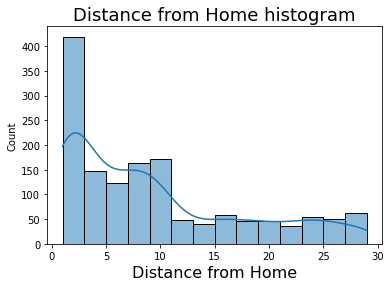

In [52]:
sns.boxplot(df.DistanceFromHome)
plt.xlabel(" ")
plt.ylabel("Distance from Home", fontsize=14)
plt.title("Distance from Home Boxplot",fontsize=16)
plt.show()
sns.histplot(df.DistanceFromHome, kde = True)
plt.title('Distance from Home histogram', fontsize=18)
plt.xlabel('Distance from Home', fontsize=16)
plt.show()

In [53]:
# Utility Function for graph
def table_df(x): 
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

# Bivariate Analysis

## Categorical Features


In [54]:
# Column's that are categorical or discrete
data_categorical=df[['BusinessTravel', 'MaritalStatus', 'OverTime', 'Department', 'EducationField', 'Gender']]

In [55]:
# Business Travel
table_df('BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


In [56]:
# Department
table_df('Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


In [57]:
# Education Field
table_df('EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


In [58]:
# Gender
table_df('Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


In [59]:
# Marital Status
table_df('MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


In [60]:
# Overtime
table_df('OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


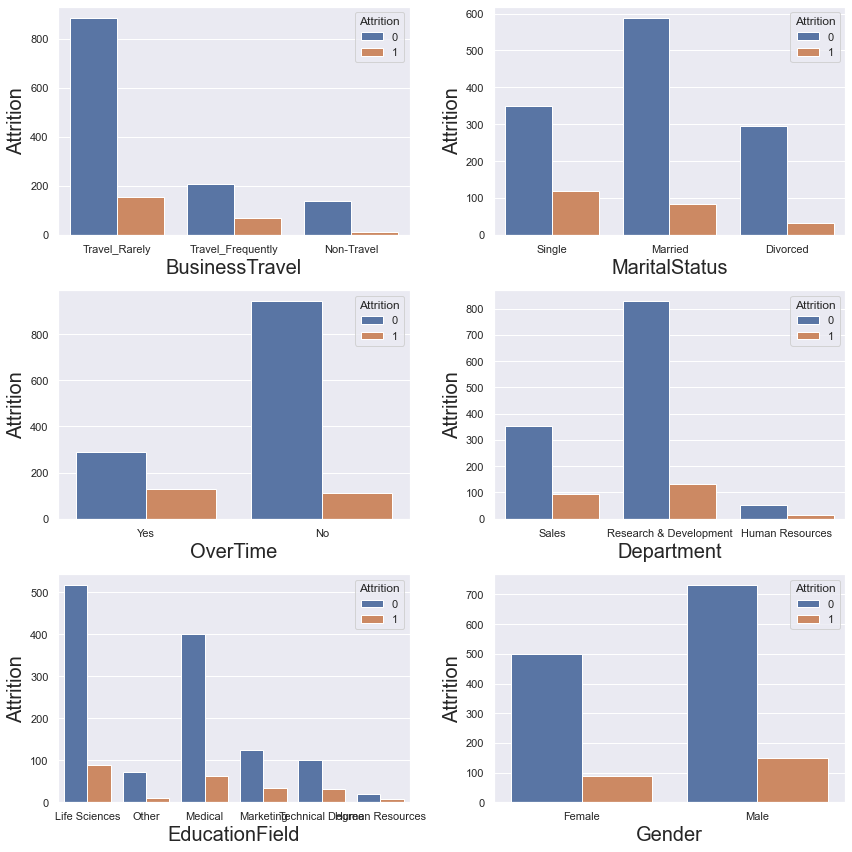

In [61]:
# Plotting every freature with target variable i.e Attrition
plt.figure(figsize=(12,12), facecolor='white')
plotnumber = 1
sns.set()
for column in data_categorical:
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=data_categorical[column]
                        ,hue=df['Attrition'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

From above plots and tables we can see that,
* In Business travel, maximum number of attrition's is from Travel Rarely category of employee's while highest proportion is from Travel frequently category of employee's in the company while the least in terms of percentage and number is from Non-Travel category's of employee.
* In Marital Status, maximum number of attrition in terms of percentage and number is from single category of employee's and least being from Divorced category of employee's.
* In Overtime, maximum number of attrition in terms of percentage and number is from employee's who have worked overtime i.e 'Yes' category.
* In Department, maximum number of attritions are from Research and Development while maximum proportion of attrition is from Sales.
* In Education Field, maximum number of attritions are from Life Sciences while maximum proportion of attrition is from Human Resources as well as the minimum number of attritions being from Human Resources.
* In Gender, maximum number and maximum proportion of attrition is from Male employees.




## Discrete Feautres

In [62]:
data_discrete = df[['EnvironmentSatisfaction','JobInvolvement', 'JobLevel','JobSatisfaction','WorkLifeBalance']]

In [63]:
# Environment Satisfaction
table_df('EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,284,72,25.352113,30.379747
1,2,287,43,14.982578,18.143460
2,3,453,62,13.686534,26.160338
3,4,446,60,13.452915,25.316456


In [64]:
# Job Involvement
table_df('JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,83,28,33.734940,11.814346
1,2,375,71,18.933333,29.957806
2,3,868,125,14.400922,52.742616
3,4,144,13,9.027778,5.485232


In [65]:
# Job Level
table_df('JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,543,143,26.335175,60.337553
1,2,534,52,9.737828,21.940928
2,3,218,32,14.678899,13.502110
3,4,106,5,4.716981,2.109705
4,5,69,5,7.246377,2.109705


In [66]:
# Job Satisfaction
table_df('JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,289,66,22.837370,27.848101
1,2,280,46,16.428571,19.409283
2,3,442,73,16.515837,30.801688
3,4,459,52,11.328976,21.940928


In [67]:
# Work Life Balance
table_df('WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,80,25,31.250000,10.548523
1,2,344,58,16.860465,24.472574
2,3,893,127,14.221725,53.586498
3,4,153,27,17.647059,11.392405


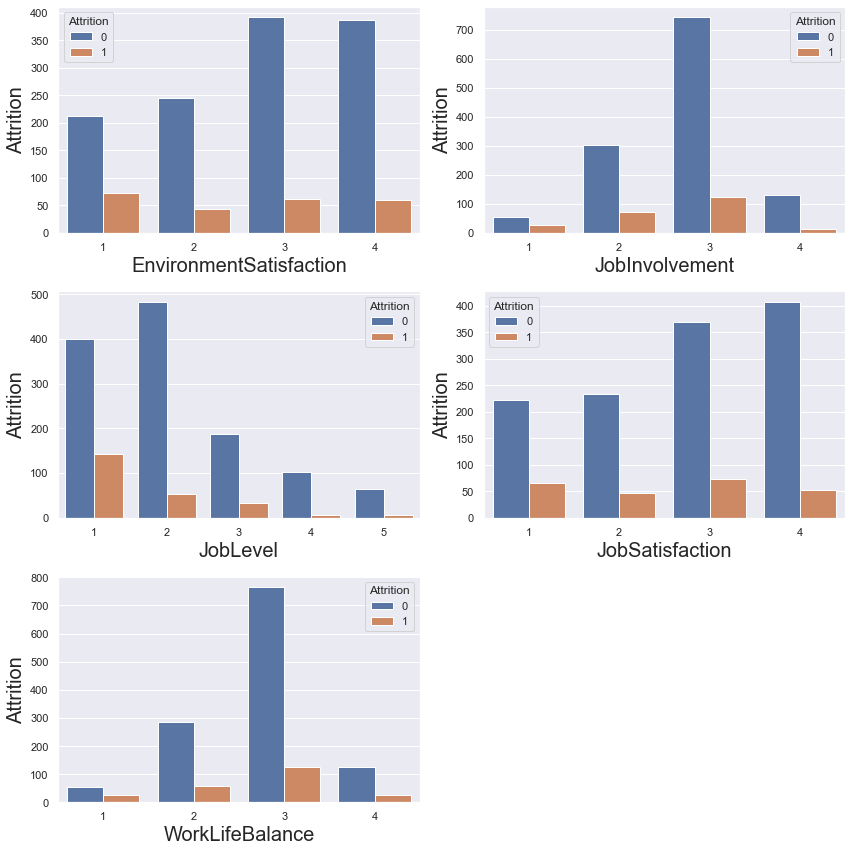

In [68]:
# Plotting every freature with target variable i.e Attrition
plt.figure(figsize=(12,12), facecolor='white')
plotnumber = 1
sns.set()
for column in data_discrete:
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=data_discrete[column]
                        ,hue=df['Attrition'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above plots and tables we can see that,
* In Environment staisfaction, maximum number of attritions are from 1st level as well as maximum proportion is also from 1st level while the minimum being from 2nd level of Environment satisfaction.
* In Job Involvement, maximum number of attritions is from 3rd level and maximum proportion of attrition is from 1st level of Job Involvement while minimum number of attritions are from highest level of Job Involvement.
* In Job level, maximum number of attritions is from 1st level as well as maximum proportion of attrition is from 1st level too while minimum number of attritions are from highest levels of Job Level.
* In Job staisfaction, maximum number of attritions are from 3rd level while maximum proportion of attrition is from 1st level of job satisfaction while the minimum being from highest level of Job satisfaction.
* In Work Life Balance, maximum number of attritions are from 3rd level while maximum proportion of attrition is from 1st level of Work Life Balance.

## Continuous Features

### Age

In [69]:
# Creating Bins for Age
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
# Adding these bins in dataframe
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [70]:
table_df('Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


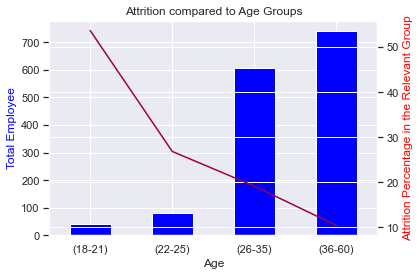

In [71]:
graph_df('Age')

From the above graph and plot we can see that,
*   In 18-21 age group, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% and that makes up 9% of all attrition.
*   If we see overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition. That makes up approximately 49% of all attrition in the company.
* 35-60 age group generally prefers to stay in the same company.

### Monthly Income

In [72]:
# Creating the bins for Monthly income
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [73]:
table_df("MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


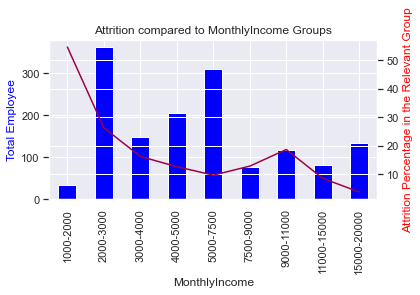

In [74]:
graph_df("MonthlyIncome", z = 90)

From the above graph and plot we can see that,
* 2000-3000 monthly income level, there is high attrition and it comprises of 40% of the company.
* 1000-2000 monthly income level, there is high attrition in its own group i.e. 54.5%.
* As the monthly income increses, there is dip in attrition but at 9000-11000, there is rise in attrition level in their particular group.

### Total Working Years

In [75]:
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [76]:
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


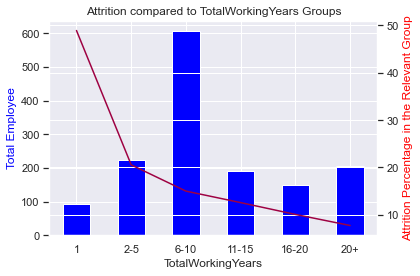

In [77]:
graph_df(x = 'TotalWorkingYears')

From the above plot & table we can see that,
* Employees who have 6-10 years experience have highest attrition percentage throughout the company and it compose the 38.4% of all attrition.
* Employees who have one year or less working experience function are more likely to leave the company.

### Years at Company

In [78]:
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [79]:
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


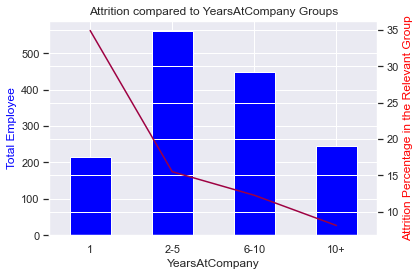

In [80]:
graph_df(x = 'YearsAtCompany')

From the above plot and table we can see that,
* Employees who have one year or less working experience in the company has the highest attrition percentage in its individual group (34.9% of attrition in the relevant group).
* Besides that, highest attrition number, which is 87 employees, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company.

### Years in Current Role

In [81]:
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [82]:
table_df('YearsInCurrentRole')

,YearsInCurrentRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,301,84,27.906977,35.443038
1,2-4,611,99,16.202946,41.772152
2,5-6,73,3,4.109589,1.265823
3,7,222,31,13.963964,13.080169
4,8-10,185,15,8.108108,6.329114
5,10+,78,5,6.410256,2.109705


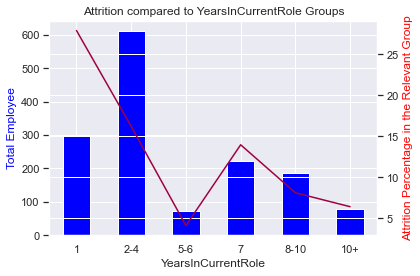

In [83]:
graph_df(x = 'YearsInCurrentRole')

From the above plot and table we can see that,
* Employee's who have 2-4 years of experience in the company are more prone to leaving the company as it has highest attrition level of 41.7% in the the company.
* Employee's who have years less than 1 year has highest attrition level in their own group.

### Years since last promotion

In [84]:
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [85]:
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


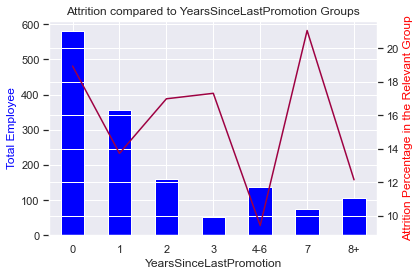

In [86]:
graph_df(x = 'YearsSinceLastPromotion')

From the above plot and table we can see that,
* Employee's who dont fulfill his one year since last promotion are more likely to leave the company.
* Employee's who have fulfilled 7 years since last promotion have the highest attrition in their own group.

### Years with Current Manager

In [87]:
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [88]:
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


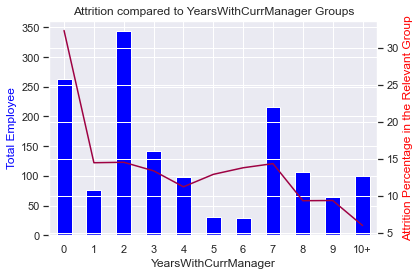

In [89]:
graph_df(x = 'YearsWithCurrManager')

From the above an dtable we can see that,
* Most of the employee's left the company before completing the first year with the current manager.
* Other group who leave the company most is the one who works with 2 years with current manager.

### Distance From Home

In [90]:
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [91]:
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


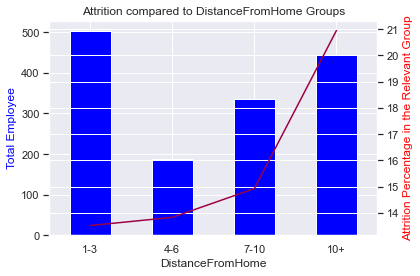

In [92]:
graph_df(x = 'DistanceFromHome')

From the above plot and table we can see that,
* Employees whose homes are 1-3 in relative unit, has the attrition rate of 28% in the company.
* Attrition in their relevant group is increasing as the distance is increasing.

# Multivariate Analysis

In [93]:
corr = df.corr()
corr.style.background_gradient()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Age,1.000000,-0.159205,0.010146,0.029820,0.509604,-0.004892,0.497855,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.001686
Attrition,-0.159205,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,-0.171063,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.077924
EnvironmentSatisfaction,0.010146,-0.103369,1.000000,-0.008278,0.001212,-0.006784,-0.006259,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.016075
JobInvolvement,0.029820,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.008783
JobLevel,0.509604,-0.169105,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.782208,0.037818,0.534739,0.389447,0.353885,0.375281,0.005303
JobSatisfaction,-0.004892,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.003669
MonthlyIncome,0.497855,-0.159840,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,0.680381,-0.171063,-0.002693,-0.005533,0.782208,-0.020185,0.772893,1.000000,0.001008,0.628133,0.460365,0.404858,0.459188,0.004628
WorkLifeBalance,-0.021490,-0.063939,0.027627,-0.014617,0.037818,-0.019459,0.030683,0.001008,1.000000,0.012089,0.049856,0.008941,0.002759,-0.026556
YearsAtCompany,0.311309,-0.134392,0.001458,-0.021355,0.534739,-0.003803,0.514285,0.628133,0.012089,1.000000,0.758754,0.618409,0.769212,0.009508


From the above correlation heat map we can see that, 
* Features having strong correlation (Correlation > 0.75)
    * Job Level and Monthly Income :- This is evident as the job level increase the monthly income will also increase.
    * Job Level and Total Working Years :- As an employee works his job level also increases.
    * Monthly Income and Total Working Years :- As an employee gains year of experience then monthly income also increases.
    

        

# Preprocessing

In [94]:
df

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [95]:
# BusinessTravel, Department, EducationField, Gender,Marital Status, Overtime

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label Encoding for Gender
temp = le.fit_transform(df['Gender'])
df = pd.concat([df,pd.Series(temp)],axis=1)
df = df.drop('Gender', axis = 1)
df.rename(columns = {0:'Gender'}, inplace = True)

# Label Encoding for Overtime
temp2 = le.fit_transform(df['OverTime'])
df = pd.concat([df,pd.Series(temp2)],axis=1)
df = df.drop('OverTime', axis = 1)
df.rename(columns = {0:'OverTime'}, inplace = True)
df

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Gender,OverTime
0,41,1,Travel_Rarely,Sales,Life Sciences,2,3,2,4,Single,5993,8,1,6,4,0,5,1,0,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,2,2,2,Married,5130,10,3,10,7,1,7,8,1,0
2,37,1,Travel_Rarely,Research & Development,Other,4,2,1,3,Single,2090,7,3,0,0,0,0,2,1,1
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,3,1,3,Married,2909,8,3,8,7,3,0,3,0,1
4,27,0,Travel_Rarely,Research & Development,Medical,1,3,1,2,Married,3468,6,3,2,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,4,2,4,Married,2571,17,3,5,2,0,3,23,1,0
1466,39,0,Travel_Rarely,Research & Development,Medical,4,2,3,1,Married,9991,9,3,7,7,1,7,6,1,0
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,4,2,2,Married,6142,6,3,6,2,0,3,4,1,1
1468,49,0,Travel_Frequently,Sales,Medical,4,2,2,2,Married,5390,17,2,9,6,0,8,2,1,0


In [97]:
# One Hot Encoding for Business Travel
bussiness_travel = pd.get_dummies(df['BusinessTravel'],prefix='Business')
df=pd.concat([df,bussiness_travel],axis=1)
df = df.drop('BusinessTravel', axis = 1)

# One Hot Encoding for Department
department = pd.get_dummies(df['Department'],prefix='Department')
df=pd.concat([df,department],axis=1)
df = df.drop('Department', axis = 1)

# One Hot Encoding for Education Field
educationField = pd.get_dummies(df['EducationField'],prefix='EducationField')
df=pd.concat([df,educationField],axis=1)
df = df.drop('EducationField', axis = 1)

# One Hot Encoding for Education Field
maritalStatus = pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')
df=pd.concat([df,maritalStatus],axis=1)
df = df.drop('MaritalStatus', axis = 1)
df

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,3,2,4,5993,8,1,6,...,1,0,1,0,0,0,0,0,0,1
1,49,0,3,2,2,2,5130,10,3,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1,4,2,1,3,2090,7,3,0,...,0,0,0,0,0,1,0,0,0,1
3,33,0,4,3,1,3,2909,8,3,8,...,0,0,1,0,0,0,0,0,1,0
4,27,0,1,3,1,2,3468,6,3,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,4,2,4,2571,17,3,5,...,0,0,0,0,1,0,0,0,1,0
1466,39,0,4,2,3,1,9991,9,3,7,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,2,4,2,2,6142,6,3,6,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,4,2,2,2,5390,17,2,9,...,1,0,0,0,1,0,0,0,1,0


## Model Building

In [98]:
# Splitting Training and Test set
y = df['Attrition']
X = df.drop('Attrition', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Splitting Training and Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [100]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_valid)

In [101]:
clf_report = pd.DataFrame(classification_report(y_valid, pred, output_dict=True))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_valid, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_valid, pred)}\n")

Validation Result:
Accuracy Score: 84.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859813   0.681818   0.84322    0.770816      0.825873
recall       0.963351   0.333333   0.84322    0.648342      0.843220
f1-score     0.908642   0.447761   0.84322    0.678202      0.820762
support    191.000000  45.000000   0.84322  236.000000    236.000000
_______________________________________________
Confusion Matrix: 
 [[184   7]
 [ 30  15]]



In [102]:
neighbors = KNeighborsClassifier(n_neighbors=10)
neighbors.fit(X_train, y_train)
y_pred = neighbors.predict(X_valid)

In [103]:
clf_report = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_valid, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_valid, y_pred)}\n")

Validation Result:
Accuracy Score: 80.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.813043   0.333333  0.800847    0.573188      0.721573
recall       0.979058   0.044444  0.800847    0.511751      0.800847
f1-score     0.888361   0.078431  0.800847    0.483396      0.733925
support    191.000000  45.000000  0.800847  236.000000    236.000000
_______________________________________________
Confusion Matrix: 
 [[187   4]
 [ 43   2]]



### Test Results

In [104]:
# Decision Tree Classifier
pred = tree_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 82.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.866906   0.125000  0.826531    0.495953      0.768490
recall       0.945098   0.051282  0.826531    0.498190      0.826531
f1-score     0.904315   0.072727  0.826531    0.488521      0.794003
support    255.000000  39.000000  0.826531  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[241  14]
 [ 37   2]]



In [105]:
# KNeighboursClassifier
y_pred = neighbors.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871972   0.400000  0.863946    0.635986      0.809364
recall       0.988235   0.051282  0.863946    0.519759      0.863946
f1-score     0.926471   0.090909  0.863946    0.508690      0.815631
support    255.000000  39.000000  0.863946  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[252   3]
 [ 37   2]]



    We Can see that KNeighbours Classifier at 10 neighbours produced the best result in terms of accuracy. 